## PYTHON PROJECT 

# Stocks Data Analysis & Visualisation

###  IMPORT LIBRARIES/DATASETS AND VISUALIZE STOCKS DATA

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [2]:
# Read the stock data file
stocks_df = pd.read_csv('stock1.csv')
stocks_df.head()

Date       AAPL         BA          T    MGM        AMZN         IBM  \
0  2012-01-12  60.198570  75.510002  30.120001  12.13  175.929993  180.550003   
1  2012-01-13  59.972858  74.599998  30.070000  12.35  178.419998  179.160004   
2  2012-01-17  60.671429  75.239998  30.250000  12.25  181.660004  180.000000   
3  2012-01-18  61.301430  75.059998  30.330000  12.73  189.440002  181.070007   
4  2012-01-19  61.107143  75.559998  30.420000  12.80  194.449997  180.520004   

        TSLA        GOOG        sp500  
0  28.250000  313.644379  1295.500000  
1  22.790001  311.328064  1289.089966  
2  26.600000  313.116364  1293.670044  
3  26.809999  315.273285  1308.040039  
4  26.760000  318.590851  1314.500000

In [3]:
# Sort the data based on Date
stocks_df = stocks_df.sort_values(by = ['Date'])
stocks_df.head()

Date       AAPL         BA          T    MGM        AMZN         IBM  \
0  2012-01-12  60.198570  75.510002  30.120001  12.13  175.929993  180.550003   
1  2012-01-13  59.972858  74.599998  30.070000  12.35  178.419998  179.160004   
2  2012-01-17  60.671429  75.239998  30.250000  12.25  181.660004  180.000000   
3  2012-01-18  61.301430  75.059998  30.330000  12.73  189.440002  181.070007   
4  2012-01-19  61.107143  75.559998  30.420000  12.80  194.449997  180.520004   

        TSLA        GOOG        sp500  
0  28.250000  313.644379  1295.500000  
1  22.790001  311.328064  1289.089966  
2  26.600000  313.116364  1293.670044  
3  26.809999  315.273285  1308.040039  
4  26.760000  318.590851  1314.500000

In [4]:
# Function to normalize the prices based on the initial price
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

In [5]:
# Function to plot interactive plot
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [6]:
# Plot interactive chart
interactive_plot(stocks_df, 'Prices')

In [7]:
# Plot normalized interactive chart
interactive_plot(normalize(stocks_df), 'Normalized Prices')

### CALCULATE DAILY RETURNS

In [8]:
# Function to calculate the daily returns 
def daily_return(df):

  df_daily_return = df.copy()
  
  # Loop through each stock
  for i in df.columns[1:]:
    
    # Loop through each row belonging to the stock
    for j in range(1, len(df)):
      
      # Calculate the percentage of change from the previous day
      df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
    
    # set the value of first row to zero, as previous value is not available
    df_daily_return[i][0] = 0
  return df_daily_return

In [9]:
# Get the daily returns 
stocks_daily_return = daily_return(stocks_df)
stocks_daily_return.head()

Date      AAPL        BA         T       MGM      AMZN       IBM  \
0  2012-01-12  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  2012-01-13 -0.374946 -1.205144 -0.166006  1.813685  1.415339 -0.769869   
2  2012-01-17  1.164812  0.857909  0.598603 -0.809717  1.815943  0.468852   
3  2012-01-18  1.038382 -0.239234  0.264463  3.918367  4.282725  0.594448   
4  2012-01-19 -0.316937  0.666134  0.296736  0.549882  2.644634 -0.303752   

        TSLA      GOOG     sp500  
0   0.000000  0.000000  0.000000  
1 -19.327430 -0.738516 -0.494792  
2  16.717854  0.574410  0.355295  
3   0.789470  0.688856  1.110793  
4  -0.186494  1.052283  0.493866

In [10]:
stocks_daily_return.mean()
# S&P500 average daily return is 0.049%
# Amazon average daily return is 0.15%
# Google average daily return is 0.084%

AAPL     0.107695
BA       0.065907
T        0.008159
MGM      0.064662
AMZN     0.151122
IBM     -0.006091
TSLA     0.238398
GOOG     0.084392
sp500    0.049316
dtype: float64

### CALCULATE BETA FOR A SINGLE STOCK

In [11]:
# Select any stock, let's say Apple 
stocks_daily_return['AAPL']

0       0.000000
1      -0.374946
2       1.164812
3       1.038382
4      -0.316937
          ...   
2154    0.362467
2155    3.488923
2156   -2.449458
2157    1.453480
2158   -2.973987
Name: AAPL, Length: 2159, dtype: float64

In [12]:
# Select the S&P500 (Market)
stocks_daily_return['sp500'].head()

0    0.000000
1   -0.494792
2    0.355295
3    1.110793
4    0.493866
Name: sp500, dtype: float64

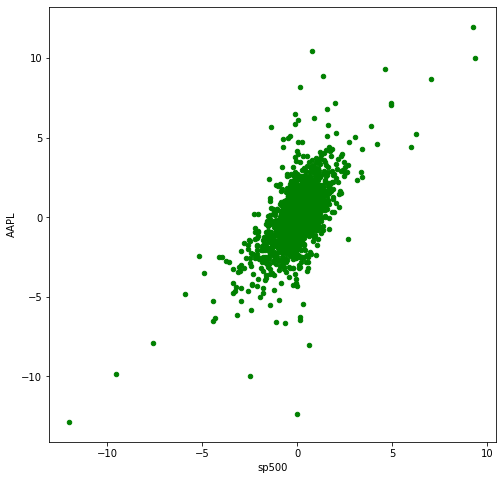

In [13]:
# plot a scatter plot between the selected stock and the S&P500 (Market)
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'AAPL',figsize=(8, 8),color='green')
plt.show()

In [14]:
# Fit a polynomial between the selected stock and the S&P500 (Poly with order = 1 is a straight line)

# beta represents the slope of the line regression line (market return vs. stock return). 
# Beta is a measure of the volatility or systematic risk of a security or portfolio compared to the entire market (S&P500) 
# Beta is used in the CAPM and describes the relationship between systematic risk and expected return for assets 

# Beta = 1.0, this indicates that its price activity is strongly correlated with the market. 
# Beta < 1, indicates that the security is theoretically less volatile than the market (Ex: Utility stocks). If the stock is included, this will make the portfolio less risky compared to the same portfolio without the stock.
# Beta > 1, indicates that the security's price is more volatile than the market. For instance, Tesla stock beta is 1.26 indicating that it's 26% more volatile than the market. 
# Tech stocks generally have higher betas than S&P500 but they also have excess returns
# MGM is 65% more volatile than the S&P500!


beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['AAPL'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('AAPL', round(beta,3), round(alpha,3)))  

Beta for AAPL stock is = 1.113 and alpha is = 0.053


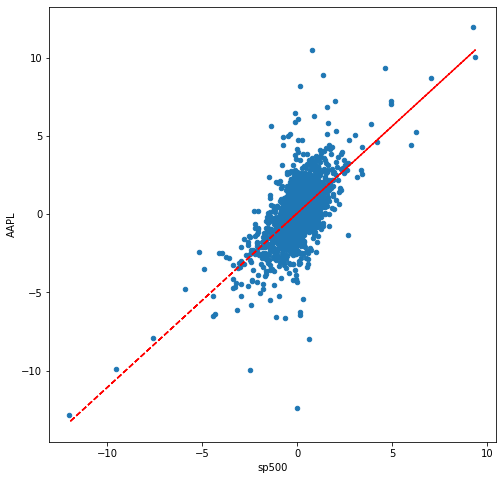

In [15]:
# Now let's plot the scatter plot and the straight line on one plot
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'AAPL',figsize=(8, 8))

# Straight line equation with alpha and beta parameters 
# Straight line equation is y = beta * rm + alpha
plt.plot(stocks_daily_return['sp500'], beta * stocks_daily_return['sp500'] + alpha, '--', color = 'r')
plt.show()


In [16]:
beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['TSLA'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('TSLA', round(beta,3), round(alpha,3)))  

Beta for TSLA stock is = 1.269 and alpha is = 0.176


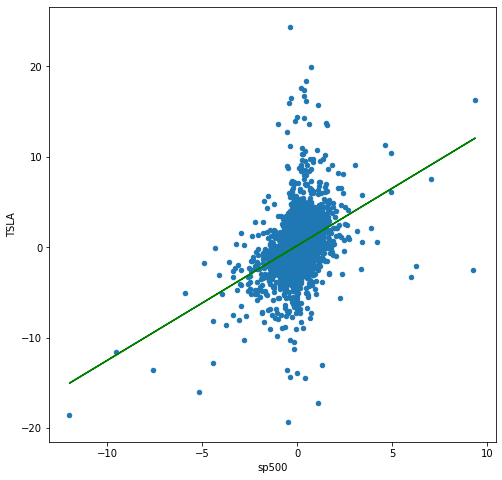

In [17]:
# Now let's plot the scatter plot and the straight line on one plot
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'TSLA',figsize=(8, 8))

# Straight line equation with alpha and beta parameters 
# Straight line equation is y = beta * rm + alpha
plt.plot(stocks_daily_return['sp500'], beta * stocks_daily_return['sp500'] + alpha, '-', color = 'g')
plt.show()

### APPLY THE CAPM FORMULA TO AN INDIVIDUAL STOCK 

In [18]:
beta

1.2686150101095912

In [19]:
# Let's calculate the average daily rate of return for S&P500
stocks_daily_return['sp500'].mean()

0.04931600660038911

In [20]:
# Let's calculate the annualized rate of return for S&P500 
# Note that out of 365 days/year, stock exchanges are closed for 104 days during weekend days (Saturday and Sunday) 
# Check your answers with: https://dqydj.com/sp-500-return-calculator/
rm = round(stocks_daily_return['sp500'].mean() * 252,3)
rm

12.428

In [21]:
# Assume risk free rate is zero
# Also you can use the yield of a 10-years U.S. Government bond as a risk free rate
rf = 0.66 

# Calculate return for any security (APPL) using CAPM  
ER_AAPL = round(rf + ( beta * (rm-rf) ) ,3)
ER_AAPL

15.589

In [22]:
# You have to calculate Beta for AT&T first
beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['T'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('T', round(beta,3), round(alpha,3)))

Beta for T stock is = 0.745 and alpha is = -0.029


In [23]:
# Calculate return for AT&T using CAPM  
ER_T = round(rf + ( beta * (rm - rf) ),3) 
print(ER_T)

9.423


In [24]:
# Let's do the same plots but in an interactive way
# Explore some wierd points in the dataset: Tesla stock return was at 24% when the S&P500 return was -0.3%!

for i in stocks_daily_return.columns:
  
  if i != 'Date' and i != 'sp500':
    
    # Use plotly express to plot the scatter plot for every stock vs. the S&P500
    fig = px.scatter(stocks_daily_return, x = 'sp500', y = i, title = i)

    # Fit a straight line to the data and obtain beta and alpha
    b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)
    
    # Plot the straight line 
    fig.add_scatter(x = stocks_daily_return['sp500'], y = b*stocks_daily_return['sp500'] + a)
    fig.show()

### CALCULATE BETA FOR ALL STOCKS

In [25]:
# Let's view Beta for every stock 
beta

0.744629345474785

In [26]:
# Let's view alpha for each of the stocks
# Alpha describes the strategy's ability to beat the market (S&P500)
# Alpha indicates the “excess return” or “abnormal rate of return,” 
# A positive 0.175 alpha for Tesla means that the portfolio’s return exceeded the benchmark S&P500 index by 17%.

alpha

-0.028563430198461717

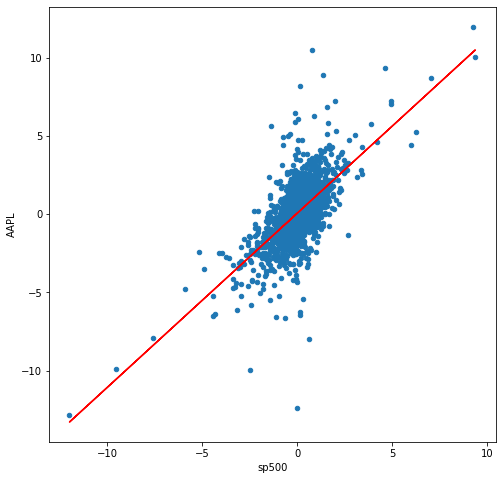

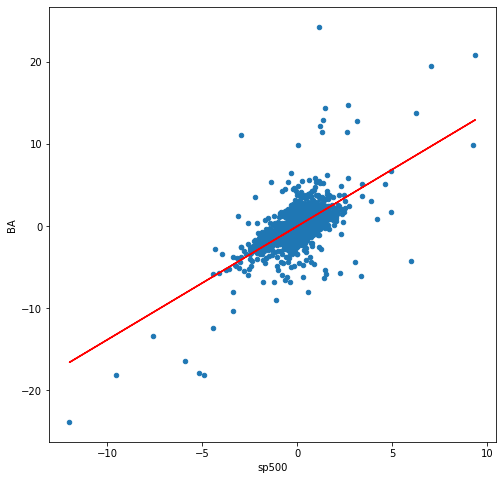

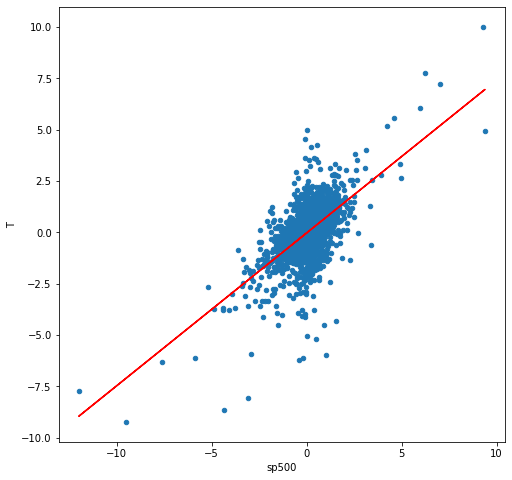

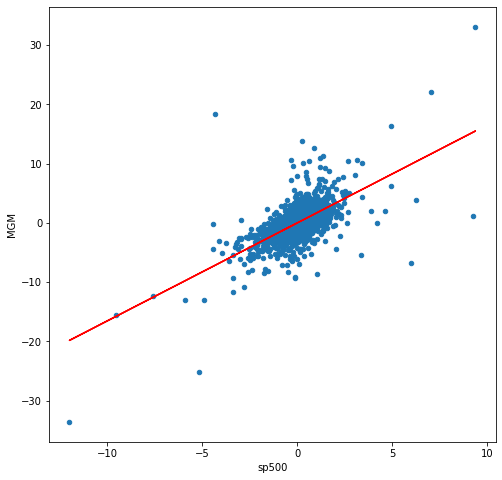

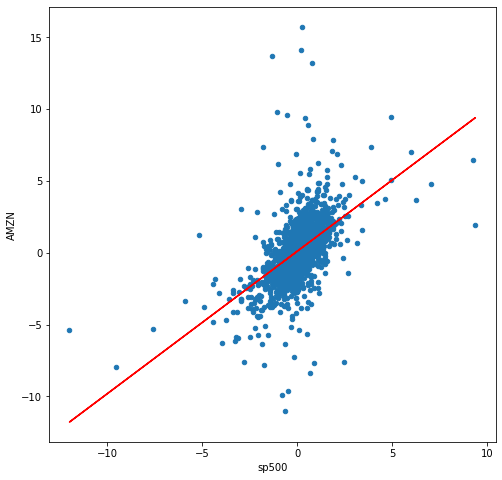

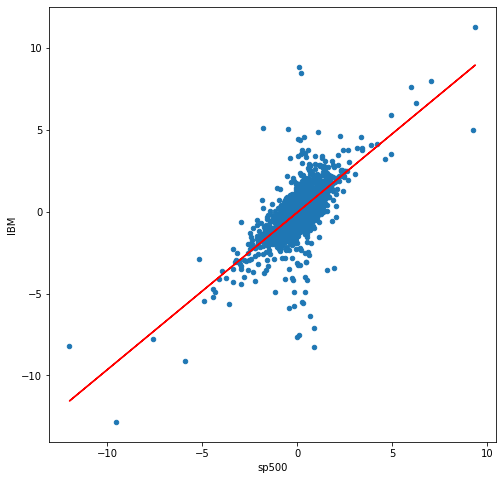

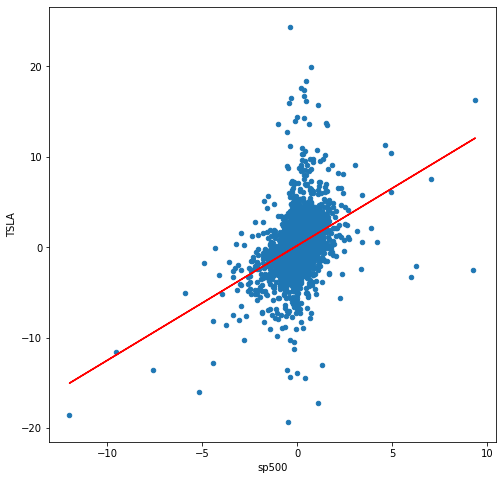

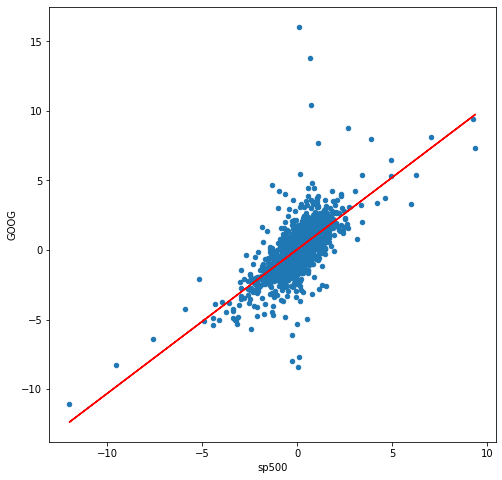

In [27]:
# Let's create a placeholder for all betas and alphas (empty dictionaries)
beta = {}
alpha = {}

# Loop on every stock daily return
for i in stocks_daily_return.columns:

  # Ignoring the date and S&P500 Columns 
  if i != 'Date' and i != 'sp500':
    # plot a scatter plot between each individual stock and the S&P500 (Market)
    stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = i,figsize=(8, 8))
    
    # Fit a polynomial between each stock and the S&P500 (Poly with order = 1 is a straight line)
    b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)
    
    plt.plot(stocks_daily_return['sp500'], b * stocks_daily_return['sp500'] + a, '-', color = 'r')
    
    beta[i] = b
    
    alpha[i] = a
    
    plt.show()

In [28]:
# Obtain a list of all stock names
keys = list(beta.keys())
keys

['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG']

In [29]:
# Define the expected return dictionary
ER = {}

rf = 0.66
rm = round(stocks_daily_return['sp500'].mean() * 252,3) # this is the expected return of the market 
rm

12.428

#### From Business & Market :
- Technology company : AAPL 
- Aerospace company : BA
- Telecommunications company : T 
- Hospitality company :  MGM
- E-commerce company : AMZN
- Computer hardware company : IBM
- Electric car company : TSLA
- Multinational conglomerate company : GOOG

In [30]:
for i in keys:
  # Calculate return for every security using CAPM  
  ER[i] = rf + ( beta[i] * (rm-rf) ) 

In [31]:
for i in keys:
  print('Expected Return Based on CAPM for {} is {}%'.format(i, round(ER[i],3)))

Expected Return Based on CAPM for AAPL is 13.757%
Expected Return Based on CAPM for BA is 16.934%
Expected Return Based on CAPM for T is 9.423%
Expected Return Based on CAPM for MGM is 20.119%
Expected Return Based on CAPM for AMZN is 12.331%
Expected Return Based on CAPM for IBM is 11.962%
Expected Return Based on CAPM for TSLA is 15.589%
Expected Return Based on CAPM for GOOG is 12.838%


In [32]:
# Assume equal weights in the portfolio
portfolio_weights = 1/8 * np.ones(8) 
portfolio_weights

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [33]:
# Calculate the portfolio return 
ER_portfolio_all = round(sum(list(ER.values()) * portfolio_weights),3)
print('Expected Return Based on CAPM for the portfolio  is {}%\n'.format(ER_portfolio_all))

Expected Return Based on CAPM for the portfolio  is 14.119%



### Suggested to invest, Returns better than S&P 500

In [34]:
# Calculate the portfolio return 
ER_portfolio = round(0.50 * ER['AAPL'] +  0.50 * ER['AMZN'],3)
print('Expected Return Based on CAPM for the portfolio (50% allocation in Apple and 50% in Amazon) is {}%\n'
      .format(ER_portfolio))

Expected Return Based on CAPM for the portfolio (50% allocation in Apple and 50% in Amazon) is 13.044%



### Suggested to invest, Returns better than S&P 500

In [35]:
# Calculate the portfolio return 
ER_portfolio_ConsumerServices = round(0.50 * ER['T'] +  0.50 * ER['MGM'],3)
print('Expected Return Based on CAPM for the portfolio (Consumer Services) is {}%\n'
      .format(ER_portfolio_ConsumerServices))

Expected Return Based on CAPM for the portfolio (Consumer Services) is 14.771%



### Suggested to invest, Returns better than S&P 500

In [36]:
# Calculate the portfolio return 
ER_portfolio_Manufacturing = round(0.50 * ER['TSLA'] +  0.50 * ER['BA'],3)
print('Expected Return Based on CAPM for the portfolio (Manufacturing Sector) is {}%\n'
      .format(ER_portfolio_Manufacturing))

Expected Return Based on CAPM for the portfolio (Manufacturing Sector) is 16.261%



### Suggested to invest, Returns better than S&P 500

In [37]:
# Calculate the portfolio return 
ER_portfolio_PersonalDevices = round(0.25 * ER['AAPL'] +  0.25 * ER['IBM']+0.25 * ER['GOOG'] +  0.25 * ER['AMZN'],3)
print('Expected Return Based on CAPM for the portfolio (Personal Devices Sector) is {}%\n'
      .format(ER_portfolio_PersonalDevices))

Expected Return Based on CAPM for the portfolio (Personal Devices Sector) is 12.722%



### Suggested to invest, Returns better than S&P 500

In [38]:
ER_portfolio_bm = round(0.25 * ER['T'] +  0.25 * ER['IBM']+0.25 * ER['GOOG'] +  0.25 * ER['AMZN'],3)
print('Expected Return Based on CAPM for the portfolio (Less than Market Return) is {}%\n'
      .format(ER_portfolio_bm))

Expected Return Based on CAPM for the portfolio (Less than Market Return) is 11.639%



### Suggested not to invest, Returns better than S&P 500

In [39]:
ER_portfolio_am = round(0.25 * ER['AAPL'] +  0.25 * ER['BA']+ 0.25 * ER['MGM'] + 0.25 * ER['TSLA'] ,3)
print('Expected Return Based on CAPM for the portfolio (Above than  Market Return) is {}%\n'
      .format(ER_portfolio_am))

Expected Return Based on CAPM for the portfolio (Above than  Market Return) is 16.6%



### Suggested to invest, Returns better than S&P 500

In [40]:
sum=0
for i in keys:
    sum=sum+ER[i] 
for i in keys:
  print('Contribution on CAPM for {} is {}'.format(i, round(ER[i]/sum,2)))

Contribution on CAPM for AAPL is 0.12
Contribution on CAPM for BA is 0.15
Contribution on CAPM for T is 0.08
Contribution on CAPM for MGM is 0.18
Contribution on CAPM for AMZN is 0.11
Contribution on CAPM for IBM is 0.11
Contribution on CAPM for TSLA is 0.14
Contribution on CAPM for GOOG is 0.11


In [41]:
ER_portfolio_b = round(.12 * ER['AAPL'] +  .15 * ER['BA']+ 0.08 * ER['T'] + .18 * ER['MGM']+ 
                     0.11 * ER['AMZN'] +  .11 * ER['IBM']+ .14* ER['TSLA'] + .11* ER['GOOG'],3)
print('Expected Return Based on CAPM for the portfolio (Balanced Weightage) is {}%\n'
      .format(ER_portfolio_b))

Expected Return Based on CAPM for the portfolio (Balanced Weightage) is 14.833%



### Suggested to invest, Returns better than S&P 500

In [42]:
ER_portfolio_hp = round(0.33 * ER['TSLA'] +  0.33 * ER['BA']+ 0.34 * ER['MGM'] ,3)
print('Expected Return Based on CAPM for the portfolio (High performing) is {}%\n'
      .format(ER_portfolio_hp))

Expected Return Based on CAPM for the portfolio (High performing) is 17.573%



### Suggested to invest, Returns better than S&P 500

In [43]:
# Calculate the portfolio return 
ER_portfolio_lp = round(0.33 * ER['T'] +  0.33 * ER['GOOG']+0.34 * ER['IBM'],3)
print('Expected Return Based on CAPM for the portfolio (Weak performing) is {}%\n'
      .format(ER_portfolio_lp))

Expected Return Based on CAPM for the portfolio (Weak performing) is 11.413%



### Suggested not to invest, Returns better than S&P 500

In [44]:
ER_portfolio_ap = round(ER['AAPL'] ,3)
print('Expected Return Based on CAPM for the portfolio (Average performing) is {}%\n'
      .format(ER_portfolio_ap))

Expected Return Based on CAPM for the portfolio (Average performing) is 13.757%



### Suggested to invest, Returns better than S&P 500

In [45]:
# Calculate the portfolio return 
ER_portfolio_ed = round(0.50 * ER['T'] +  0.50 * ER['MGM'],3)
print('Expected Return Based on CAPM for the portfolio (Extremes) is {}%\n'
      .format(ER_portfolio_ed))

Expected Return Based on CAPM for the portfolio (Extremes) is 14.771%



### Suggested to invest, Returns better than S&P 500

In [46]:
# Calculate the portfolio return 
ER_portfolio_ed = round(0.50 * ER['GOOG'] +  0.50 * ER['AAPL'],3)
print('Expected Return Based on CAPM for the portfolio (Median) is {}%\n'
      .format(ER_portfolio_ed))

Expected Return Based on CAPM for the portfolio (Median) is 13.298%



### Suggested to invest, Returns better than S&P 500

In [47]:
data = {'Combinations':['AAPL', 'BA', 'T', 'MGM','AMZN','IBM','TSLA','GOOG','Equal Portfolio Weights',
                        'AAPL+AMZN','Consumer Services','Manufacturing Sector','Personal Devices Sector',
                        'Less than Market Return','Above than  Market Return','Balanced Weightage',
                        'High performing','Weak performing','Average performing','Extremes','Median'], 
        'Expected Return Based on CAPM':[13.757,16.934, 9.423, 20.119,12.331,11.962,15.589,12.838,14.119,
                                         13.044,14.771,16.261,12.722,11.639,16.6,14.833,17.573,11.413,
                                         13.757,14.771,13.298]} 
Returns = pd.DataFrame(data)
Returns.sort_values(by='Expected Return Based on CAPM', ascending=False,inplace=True)
Returns

Combinations  Expected Return Based on CAPM
3                         MGM                         20.119
16            High performing                         17.573
1                          BA                         16.934
14  Above than  Market Return                         16.600
11       Manufacturing Sector                         16.261
6                        TSLA                         15.589
15         Balanced Weightage                         14.833
10          Consumer Services                         14.771
19                   Extremes                         14.771
8     Equal Portfolio Weights                         14.119
18         Average performing                         13.757
0                        AAPL                         13.757
20                     Median                         13.298
9                   AAPL+AMZN                         13.044
7                        GOOG                         12.838
12    Personal Devices Sector                         12.722
4                        AMZN                         12.331
5                         IBM                         11.962
13    Less than Market Return                         11.639
17            Weak performing                         11.413
2                           T                          9.423

In [48]:
print("Top 5 Suggested Portfolio") 
Returns[:5]

Top 5 Suggested Portfolio


Combinations  Expected Return Based on CAPM
3                         MGM                         20.119
16            High performing                         17.573
1                          BA                         16.934
14  Above than  Market Return                         16.600
11       Manufacturing Sector                         16.261

In [49]:
print("Bottom 5 Suggested Portfolio") 
Returns.tail()

Bottom 5 Suggested Portfolio


Combinations  Expected Return Based on CAPM
4                      AMZN                         12.331
5                       IBM                         11.962
13  Less than Market Return                         11.639
17          Weak performing                         11.413
2                         T                          9.423

# DONE....!!!!